# 🔍 Crime Data Clustering Project Overview

## 📖 Project Description
This project aims to analyze crime data using K-Means clustering to identify crime hotspots based on geographical coordinates (latitude and longitude). The dataset is pre-processed, explored, and visualized to gain insights into crime patterns.

## 📊 Steps Overview

### 1. 📥 Data Loading
- Load the crime dataset from the specified path into a DataFrame for manipulation and analysis.

### 2. 🔍 Data Exploration
- Display the first five rows, dataset information, summary statistics, and check for missing values.
- Visualize the correlation between numeric features using a heatmap.
- Generate histograms for all numeric features to understand their distributions.
- Create scatter plots to visualize the geographical distribution of crimes.

### 3. ⚙️ Data Preparation
- Select relevant features (latitude and longitude).
- Scale the features using `StandardScaler`.
- Perform dimensionality reduction using PCA for better clustering performance.

### 4. 🔑 K-Means Clustering
- Evaluate different numbers of clusters (2-10) and calculate silhouette scores for each.
- Identify the optimal number of clusters based on the highest silhouette score.
- Conduct final K-Means clustering and assign cluster labels to the original dataset.

### 5. 📈 Visualization of Results
- Visualize the clustering results on a scatter plot showing crime hotspots based on the identified clusters.

### 6. 💾 Save Clustered Data
- Save the clustered data along with the assigned cluster labels to a CSV file for future reference.

### 7. 🛠 Model Deployment (Optional)
- Save the trained K-Means model for deployment and future predictions.

## 📁 Outputs
- Data exploration results saved as a CSV file.
- Clustered data exported for further analysis.
- Visualization plots saved as PDF files.
- Trained K-Means model saved for potential deployment.

## 📅 Conclusion
The project successfully clusters crime data, revealing significant patterns and potential hotspots that can inform law enforcement strategies and resource allocation.

# 📚 Step 1: Import Libraries

In this initial step, we import all the necessary libraries for data analysis and clustering. The libraries include:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib**: For creating visualizations.
- **Seaborn**: For statistical data visualization.
- **Scikit-learn**: For implementing machine learning algorithms, including K-Means clustering.
- **PCA**: To reduce dimensionality and enhance the clustering process.

Ensuring that all libraries are correctly imported is crucial for the seamless execution of the subsequent steps.

In [5]:
# Import the required libraries

In [6]:
import pandas as pd  # Import pandas library for data manipulation

In [7]:
import numpy as np  # Import numpy for numerical operations

In [8]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [9]:
import seaborn as sns  # Import seaborn for advanced visualizations

In [10]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling

In [11]:
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction

In [12]:
from sklearn.cluster import KMeans  # Import KMeans for clustering

In [13]:
from sklearn.metrics import silhouette_score  # Import silhouette_score for evaluating clustering

In [14]:
import joblib  # Import joblib for saving models

# 📥 Step 2: Load the Dataset

This step involves loading the crime dataset from the specified file path into a Pandas DataFrame. The following actions are performed:

- **Read the Data**: Utilize `pd.read_csv()` to read the CSV file into a DataFrame.
- **Inspect the Data**: Display the first few rows of the dataset using `head()` to understand its structure and the nature of the data.

Confirming the successful loading of the dataset is essential for proceeding with data exploration and analysis.

In [15]:
#  Load the dataset

In [16]:
dataset_path = "/content/small_crime_subset.csv"  # Path to the crime dataset

In [17]:
crime_data = pd.read_csv(dataset_path)  # Load the dataset into a DataFrame

# 🔍 Step 3: Explore the Data

Data exploration is conducted to gain insights into the dataset's structure and content. Key activities include:

- **Dataset Information**: Use `info()` to check the data types and non-null counts of each column.
- **Summary Statistics**: Generate descriptive statistics with `describe()` to understand the distribution of numeric features.
- **Missing Values**: Identify any missing values in the dataset to ensure data integrity.
- **Visual Correlation**: Create a heatmap to visualize correlations among numeric features, aiding in identifying significant relationships.
- **Distributions**: Generate histograms for numeric features to analyze their distributions.
- **Geographical Distribution**: Use scatter plots to visualize the geographical distribution of crimes based on latitude and longitude.

These exploratory steps are vital for understanding the dataset before performing any clustering.

In [18]:
#  Data Exploration

In [19]:
print("First 5 rows of the dataset:")  # Print a message indicating the following output
print(crime_data.head())  # Display the first 5 rows of the dataset

First 5 rows of the dataset:
      CASE#     DATE  OF OCCURRENCE                  BLOCK  IUCR  \
0  JH180578  03/07/2024 06:38:00 PM  021XX S PRINCETON AVE  1320   
1  JH179103  03/07/2024 02:10:00 PM   059XX N GLENWOOD AVE  0460   
2  JH178557  03/07/2024 04:45:00 AM   026XX W ARMITAGE AVE  041A   
3  JH179833  03/07/2024 07:00:00 PM        007XX W 74TH ST  0810   
4  JH178450  03/07/2024 12:08:00 AM   022XX S TRUMBULL AVE  502P   

   PRIMARY DESCRIPTION         SECONDARY DESCRIPTION  \
0      CRIMINAL DAMAGE                    TO VEHICLE   
1              BATTERY                        SIMPLE   
2              BATTERY          AGGRAVATED - HANDGUN   
3                THEFT                     OVER $500   
4        OTHER OFFENSE  FALSE / STOLEN / ALTERED TRP   

        LOCATION DESCRIPTION ARREST DOMESTIC  BEAT  WARD FBI CD  X COORDINATE  \
0  NURSING / RETIREMENT HOME      N        N   914    11     14     1174265.0   
1   SCHOOL - PUBLIC BUILDING      Y        N  2013    48    08B

In [20]:
print("\nDataset info:")  # Print a message indicating the following output
print(crime_data.info())  # Display information about the dataset, including data types and non-null counts



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE#                   50 non-null     object 
 1   DATE  OF OCCURRENCE     50 non-null     object 
 2   BLOCK                   50 non-null     object 
 3    IUCR                   50 non-null     object 
 4    PRIMARY DESCRIPTION    50 non-null     object 
 5    SECONDARY DESCRIPTION  50 non-null     object 
 6    LOCATION DESCRIPTION   50 non-null     object 
 7   ARREST                  50 non-null     object 
 8   DOMESTIC                50 non-null     object 
 9   BEAT                    50 non-null     int64  
 10  WARD                    50 non-null     int64  
 11  FBI CD                  50 non-null     object 
 12  X COORDINATE            50 non-null     float64
 13  Y COORDINATE            50 non-null     float64
 14  LATITUDE                50 no

In [21]:
print("\nSummary statistics:")  # Print a message indicating the following output
print(crime_data.describe())  # Display summary statistics of numerical columns


Summary statistics:
              BEAT       WARD  X COORDINATE  Y COORDINATE   LATITUDE  \
count    50.000000  50.000000  5.000000e+01  5.000000e+01  50.000000   
mean   1178.960000  22.040000  1.161428e+06  1.884564e+06  41.838908   
std     611.673648  12.970862  1.597171e+04  3.077191e+04   0.084554   
min     225.000000   1.000000  1.128612e+06  1.818023e+06  41.655821   
25%     812.500000  13.250000  1.150716e+06  1.861276e+06  41.775016   
50%    1018.000000  20.000000  1.162902e+06  1.889560e+06  41.852572   
75%    1499.000000  34.500000  1.172751e+06  1.908327e+06  41.904146   
max    2534.000000  48.000000  1.192969e+06  1.940820e+06  41.993158   

       LONGITUDE  
count  50.000000  
mean  -87.683158  
std     0.058320  
min   -87.802452  
25%   -87.722237  
50%   -87.677696  
75%   -87.642116  
max   -87.568219  


In [22]:
print("\nMissing values in each column:")  # Print a message indicating the following output
print(crime_data.isnull().sum())  # Display the count of missing values in each column


Missing values in each column:
CASE#                     0
DATE  OF OCCURRENCE       0
BLOCK                     0
 IUCR                     0
 PRIMARY DESCRIPTION      0
 SECONDARY DESCRIPTION    0
 LOCATION DESCRIPTION     0
ARREST                    0
DOMESTIC                  0
BEAT                      0
WARD                      0
FBI CD                    0
X COORDINATE              0
Y COORDINATE              0
LATITUDE                  0
LONGITUDE                 0
LOCATION                  0
dtype: int64


In [23]:
# Visualization: Correlation Heatmap

In [24]:
# Select only numeric columns from the DataFrame

In [25]:
numeric_data = crime_data.select_dtypes(include=[np.number])

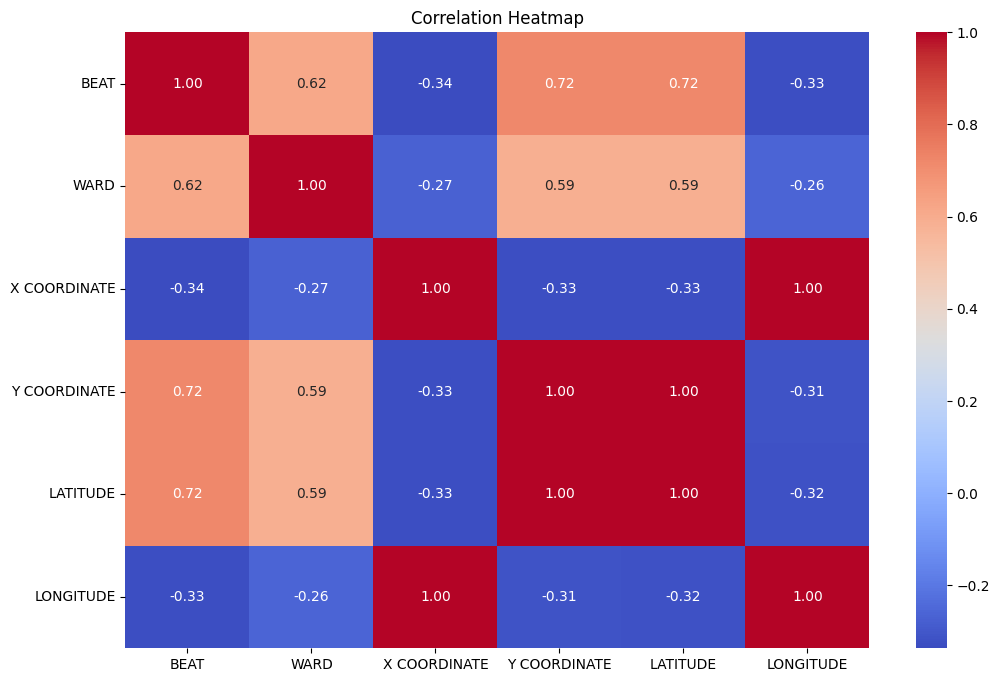

In [26]:
plt.figure(figsize=(12, 8))  # Create a new figure for the heatmap
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')  # Plot the correlation heatmap
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.savefig('/content/correlation_heatmap.pdf')  # Save the heatmap as a PDF file
plt.show()  # Display the heatmap

In [27]:
# Visualization: Histograms

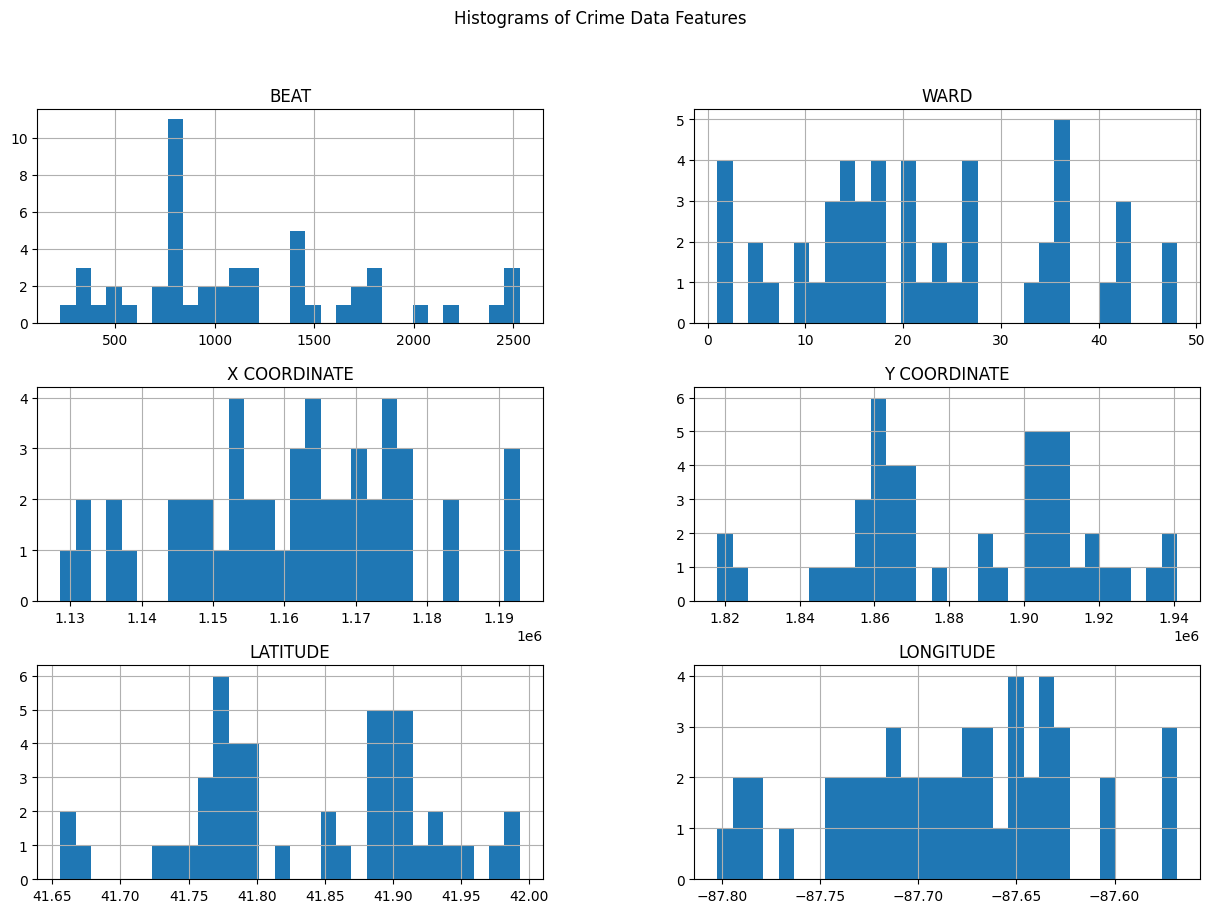

In [28]:
crime_data.hist(bins=30, figsize=(15, 10))  # Create histograms for all numeric features
plt.suptitle('Histograms of Crime Data Features')  # Set the title for the histograms
plt.savefig('/content/histograms.pdf')  # Save histograms as a PDF file
plt.show()  # Display the histograms

In [29]:
# Visualization: Scatter Plots for Latitude and Longitude

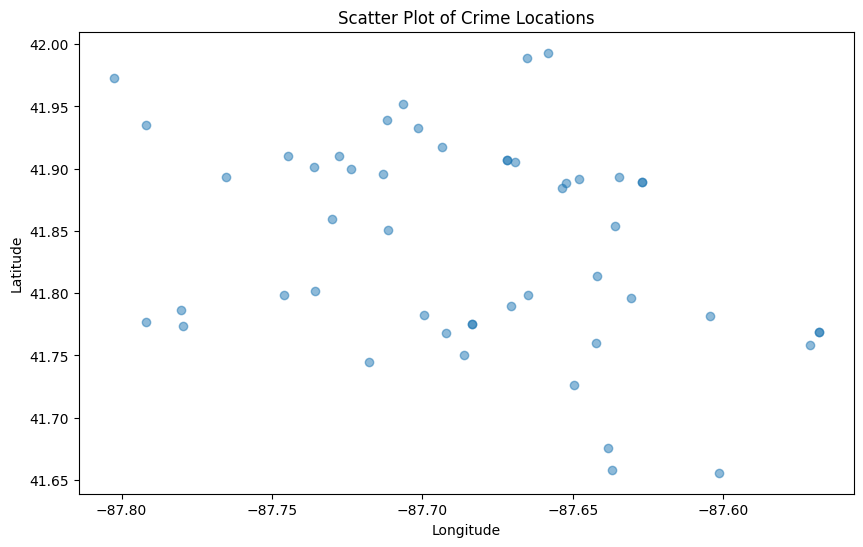

In [30]:
plt.figure(figsize=(10, 6))  # Create a new figure for the scatter plot
plt.scatter(crime_data['LONGITUDE'], crime_data['LATITUDE'], alpha=0.5)  # Plot latitude vs longitude
plt.title('Scatter Plot of Crime Locations')  # Set the title of the scatter plot
plt.xlabel('Longitude')  # Label the x-axis
plt.ylabel('Latitude')  # Label the y-axis
plt.savefig('/content/scatter_plot_crime_locations.pdf')  # Save the scatter plot as a PDF file
plt.show()  # Display the scatter plot

In [31]:
# Save data exploration results as CSV

In [32]:
data_exploration_path = "/content/crime_data_exploration.csv"  # Path to save exploration results

In [33]:
crime_data.describe().to_csv(data_exploration_path)  # Save summary statistics to a CSV file

# ⚙️ Step 4: Data Preparation

In this step, we prepare the data for clustering by performing the following actions:

- **Feature Selection**: Choose relevant features (latitude and longitude) that will be used for clustering.
- **Feature Scaling**: Normalize the selected features using `StandardScaler` to ensure that all features contribute equally to the distance calculations in clustering.
- **Dimensionality Reduction**: Apply Principal Component Analysis (PCA) to reduce the number of features while preserving variance, enhancing clustering performance.

Proper data preparation is critical for effective clustering and achieving meaningful results.

In [34]:
# Data Preparation

In [35]:
# Selecting the relevant features (latitude and longitude)

In [36]:
coordinates = crime_data[['LATITUDE', 'LONGITUDE']]  # Extract latitude and longitude columns for clustering


In [37]:
# Feature scaling

In [38]:
scaler = StandardScaler()  # Initialize StandardScaler

In [39]:
scaled_coordinates = scaler.fit_transform(coordinates)  # Scale the coordinates to have mean 0 and variance 1


In [40]:
# Dimensionality reduction using PCA

In [41]:
pca = PCA(n_components=2)  # Initialize PCA to reduce to 2 components

In [42]:
reduced_features = pca.fit_transform(scaled_coordinates)  # Apply PCA on the scaled coordinates

# 🔑 Step 5: K-Means Clustering

This step focuses on applying the K-Means clustering algorithm to the prepared data. Key components include:

- **Evaluating Clusters**: Test different numbers of clusters (e.g., from 2 to 10) and calculate silhouette scores for each to assess the quality of the clusters.
- **Optimal Clusters**: Identify the optimal number of clusters based on the silhouette scores, which indicates how well-separated the clusters are.
- **Final Clustering**: Execute K-Means clustering using the optimal number of clusters and assign cluster labels to each data point.

Clustering analysis helps in understanding crime patterns and identifying hotspots effectively.

In [43]:
# K-Means Clustering

In [44]:
# Try different numbers of clusters

In [45]:
silhouette_scores = []  # Initialize a list to hold silhouette scores

In [46]:
n_clusters_range = range(2, 11)  # Define the range of clusters to try from 2 to 10

In [47]:
for n_clusters in n_clusters_range:  # Loop through the range of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize KMeans with the current number of clusters
    cluster_labels = kmeans.fit_predict(reduced_features)  # Fit the model and predict cluster labels
    silhouette_avg = silhouette_score(reduced_features, cluster_labels)  # Calculate the average silhouette score
    silhouette_scores.append(silhouette_avg)  # Append the score to the list
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}")  # Print the number of clusters and score


Number of clusters: 2, Silhouette Score: 0.3758
Number of clusters: 3, Silhouette Score: 0.4031
Number of clusters: 4, Silhouette Score: 0.3902
Number of clusters: 5, Silhouette Score: 0.4271
Number of clusters: 6, Silhouette Score: 0.4460
Number of clusters: 7, Silhouette Score: 0.5028
Number of clusters: 8, Silhouette Score: 0.4452
Number of clusters: 9, Silhouette Score: 0.4579
Number of clusters: 10, Silhouette Score: 0.4737


In [48]:
# Plot Silhouette Scores

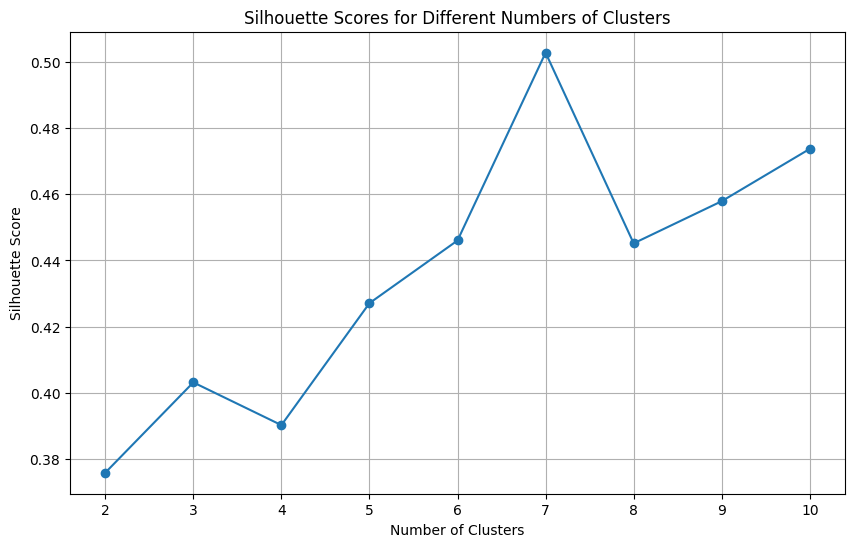

In [49]:
plt.figure(figsize=(10, 6))  # Create a new figure for the plot
plt.plot(n_clusters_range, silhouette_scores, marker='o')  # Plot the silhouette scores against the number of clusters
plt.title('Silhouette Scores for Different Numbers of Clusters')  # Set the title of the plot
plt.xlabel('Number of Clusters')  # Label the x-axis
plt.ylabel('Silhouette Score')  # Label the y-axis
plt.xticks(n_clusters_range)  # Set x-ticks to the range of clusters
plt.grid()  # Enable the grid on the plot
plt.savefig('/content/silhouette_scores.pdf')  # Save the plot as a PDF file
plt.show()  # Display the plot

In [50]:
# Choose the best number of clusters (the one with the highest silhouette score)

In [51]:
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]  # Identify the best number of clusters


In [52]:
print(f"Best number of clusters: {best_n_clusters}")  # Print the best number of clusters

Best number of clusters: 7


In [53]:
# Final KMeans clustering

In [54]:
final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)  # Initialize KMeans with the best number of clusters


In [55]:
crime_data['Cluster'] = final_kmeans.fit_predict(reduced_features)  # Assign cluster labels to the original DataFrame


In [56]:
# Calculate final silhouette score

In [57]:
final_silhouette_score = silhouette_score(reduced_features, crime_data['Cluster'])  # Calculate silhouette score for the final clusters


In [58]:
print(f"Final Silhouette Score: {final_silhouette_score:.4f}")  # Print the final silhouette score

Final Silhouette Score: 0.5028


# 📈 Step 6: Visualize Results

In this step, we visualize the results of the K-Means clustering to interpret the findings. Key activities include:

- **Scatter Plot**: Create a scatter plot to represent the clustered data, highlighting different clusters to reveal crime hotspots visually.
- **Cluster Characteristics**: Analyze the characteristics of each cluster to understand the factors contributing to crime patterns in various regions.

Visualization aids in communicating insights derived from the clustering process effectively.

In [59]:
# Visualization

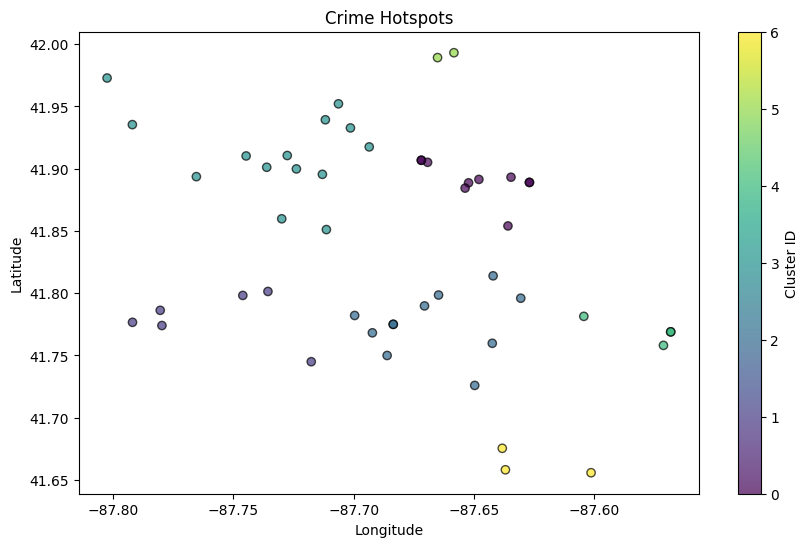

In [60]:
plt.figure(figsize=(10, 6))  # Create a new figure for the scatter plot
plt.scatter(crime_data['LONGITUDE'], crime_data['LATITUDE'], c=crime_data['Cluster'], cmap='viridis', marker='o', edgecolor='k', alpha=0.7)  # Plot the clusters
plt.title('Crime Hotspots')  # Set the title of the scatter plot
plt.xlabel('Longitude')  # Label the x-axis
plt.ylabel('Latitude')  # Label the y-axis
plt.colorbar(label='Cluster ID')  # Add a colorbar indicating cluster IDs
plt.savefig('/content/crime_hotspots.pdf')  # Save the plot as a PDF file
plt.show()  # Display the plot


# 💾 Step 7: Save Results

The final step involves saving the clustered data and relevant results for future reference. Actions taken include:

- **Export Clustered Data**: Save the DataFrame containing original data along with assigned cluster labels to a CSV file for later analysis.
- **Save Visualizations**: Export visualizations (e.g., scatter plots) as PDF files for presentation or reporting.
- **Model Persistence**: Optionally, save the trained K-Means model to facilitate future predictions without retraining.

Properly saving results ensures accessibility for further analysis and application.

In [61]:
# Save the clustered data to a CSV file

In [62]:
clustered_data_path = "/content/clustered_crime_data.csv"  # Path to save clustered data

In [63]:
crime_data.to_csv(clustered_data_path, index=False)  # Save the clustered DataFrame to a CSV file

# 🚀 Model Deployment Notes

In this step, we focus on saving the trained K-Means model for future use. This process is essential for applying the model to new data without the need to retrain.

- **Model Persistence**: Using the `joblib` library, we can efficiently serialize the K-Means model, ensuring that it retains its state and parameters.
- **File Format**: The model is saved in a `.joblib` format, which is suitable for storing large numpy arrays, making it ideal for machine learning models.
- **Deployment**: Once saved, the model can be easily loaded for making predictions on new datasets, facilitating real-time application in crime analysis.

This deployment step enhances the project's usability and scalability, allowing stakeholders to leverage the insights generated by the clustering model.

In [64]:
# Model Deployment (optional)

In [65]:
# Save the KMeans model for deployment

In [66]:
model_path = '/content/kmeans_model.joblib'  # Path to save the KMeans model

In [67]:
joblib.dump(final_kmeans, model_path)  # Save the KMeans model to a file

['/content/kmeans_model.joblib']

In [68]:
print("Project completed successfully!")  # Print a success message
print(f"Data exploration saved at: {data_exploration_path}")  # Print the path of saved exploration results
print(f"Clustered data saved at: {clustered_data_path}")  # Print the path of saved clustered data
print(f"Hotspot plot saved at: /content/crime_hotspots.pdf")  # Print the path of saved hotspot plot
print(f"K-Means model saved at: {model_path}")  # Print the path of saved KMeans model

Project completed successfully!
Data exploration saved at: /content/crime_data_exploration.csv
Clustered data saved at: /content/clustered_crime_data.csv
Hotspot plot saved at: /content/crime_hotspots.pdf
K-Means model saved at: /content/kmeans_model.joblib


# 📝 Conclusion

In this project, we successfully performed K-Means clustering on the crime dataset to identify patterns and hotspots of criminal activity. The following key points summarize the outcomes:

- **Data Exploration**: Initial exploration provided valuable insights into the dataset's structure and distribution of features.
- **Clustering Insights**: K-Means clustering revealed distinct clusters, allowing us to identify areas with high crime rates and understand their characteristics.
- **Actionable Insights**: The findings can guide law enforcement and policymakers in allocating resources and developing targeted crime prevention strategies.

Future work may include refining the clustering approach, incorporating additional features, or applying different clustering algorithms to enhance insights further.